In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r'C:\Users\ronal\OneDrive\Desktop\Ficheros+Curso+Windows\Simple Linear Regression\Boston.csv'
boston_df = pd.read_csv(file_path)

# Define the features and target variable
x_train = boston_df.drop(columns=['medv'])
y_train = boston_df['medv']

# Normalize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Convert to numpy arrays
x_train = x_train_scaled
y_train = y_train.values

# Function to compute the cost (mean squared error)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    errors = predictions - y
    total_cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return total_cost

# Function to compute the gradient for each parameter (w and b)
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    predictions = x.dot(w) + b
    errors = predictions - y
    dj_dw = (1 / m) * x.T.dot(errors)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db


# Function to perform gradient descent to minimize the cost function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function, tolerance=1e-10):
    w = w_in
    b = b_in
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
        
        # Check for convergence
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"Converged at iteration {i}: Cost {cost}")
            break
        
        if i % 1000 == 0:  # Print every 1000 iterations
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")

    return w, b, cost_history

# Initialize parameters for gradient descent
w_init = np.zeros(x_train.shape[1])  # Initialize weight to zero
b_init = 0
alpha = 0.001  # Adjusted learning rate
iterations = 10000  # Adjusted number of iterations

# Run gradient descent to optimize the weights and bias
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

# Print the optimized weights and bias
print(f"Optimized weights (w): {w_final}")
print(f"Optimized intercept (b): {b_final}")



Iteration 0: Cost 295.3348358289974, w [-0.00208204 -0.00356775  0.00331178 -0.00444447  0.00161029 -0.00392623
  0.00638898 -0.00346346  0.00229635 -0.00350639 -0.00430491 -0.00466555
  0.00306384 -0.00677765], b 0.022532806324110675
Iteration 1000: Cost 47.72559348462042, w [ 0.02822308 -0.59265522  0.46106747 -0.56179045  0.78405236 -0.43714751
  2.57608718 -0.25894972 -0.66963653 -0.01560492 -0.48767425 -1.43591614
  0.66118998 -2.27507842], b 14.255881741277559
Iteration 2000: Cost 16.619311276533487, w [ 0.07634964 -0.61417829  0.44752248 -0.48486279  0.87043675 -0.53540297
  3.1396785  -0.16659973 -1.30632934  0.34199418 -0.43196804 -1.69136994
  0.79283962 -2.90396878], b 19.489419023828656
Iteration 3000: Cost 12.254268241216431, w [ 0.01902961 -0.62980478  0.48105656 -0.43810782  0.83756051 -0.71001736
  3.23837251 -0.15210281 -1.68815782  0.58763849 -0.43906561 -1.77128144
  0.85530172 -3.19383951], b 21.413766737990922
Iteration 4000: Cost 11.529373682855839, w [-0.05169273

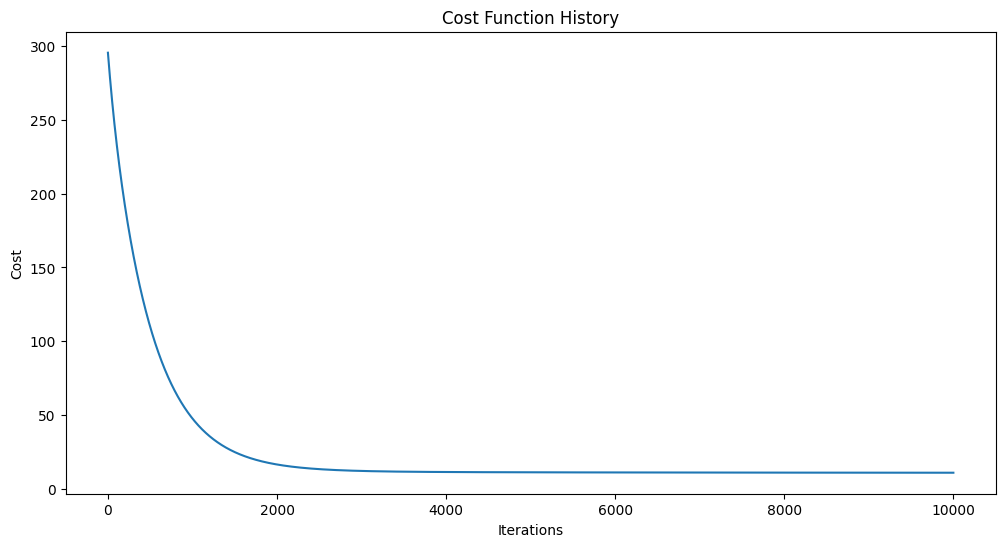

In [18]:
# Plotting the cost history to visualize how the cost decreases over iterations
plt.figure(figsize=(12, 6))
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()


In [19]:
# Comparison with scikit-learn's LinearRegression model
reg = LinearRegression().fit(x_train, y_train)
print(f"Scikit-learn weights (w): {reg.coef_}")
print(f"Scikit-learn intercept (b): {reg.intercept_}")
print(f"Scikit-learn R²: {reg.score(x_train, y_train)}")

# Calculate predictions using the scikit-learn model
y_pred_sklearn = reg.predict(x_train)

# Calculate predictions using gradient descent model
y_pred_gradient_descent = x_train.dot(w_final) + b_final

# Calculate predictions using the gradient descent model
min_value = min(np.min(y_train), np.min(y_pred_sklearn), np.min(y_pred_gradient_descent))
max_value = max(np.max(y_train), np.max(y_pred_sklearn), np.max(y_pred_gradient_descent))

# Define the ideal fit line (y = x) for comparison purposes
ideal_fit_x = np.linspace(min_value, max_value, 100)
ideal_fit_y = ideal_fit_x



Scikit-learn weights (w): [-0.36900893 -0.93459925  1.11908773  0.13660752  0.68643689 -2.0306705
  2.69483851 -0.0545111  -3.14135641  2.82641329 -1.95268196 -2.05030728
  0.85336871 -3.75379631]
Scikit-learn intercept (b): 22.532806324110677
Scikit-learn R²: 0.7414197819753733


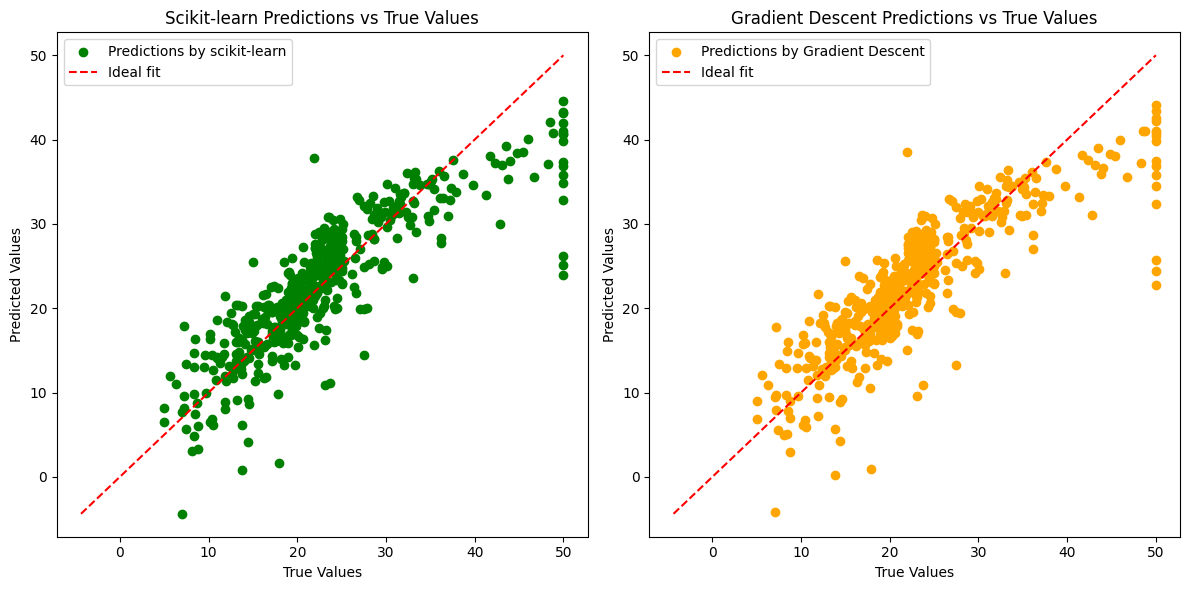

In [21]:
# Plot y_train vs. y_pred_sklearn and y_train vs. y_pred_gradient_descent
plt.figure(figsize=(12, 6))
           
# Plot for scikit-learn model
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_sklearn, color='green', label='Predictions by scikit-learn')
plt.plot(ideal_fit_x, ideal_fit_y, color='red', linestyle='--', label='Ideal fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scikit-learn Predictions vs True Values')
plt.legend()

# Plot for gradient descent model
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_gradient_descent, color='orange', label='Predictions by Gradient Descent')
plt.plot(ideal_fit_x, ideal_fit_y, color='red', linestyle='--', label='Ideal fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Descent Predictions vs True Values')
plt.legend()

plt.tight_layout()
plt.show()